In [45]:
import bt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ffn

In [5]:
tickers = {'equity':['ITOT', 'IVV', 'IJH', 'IJR', 'IUSG', 'IUSV', 'IJK', 'IJJ', 'IJS', 'IJT', 'OEF', 'IWC'],
'bond':['AGG', 'LQD', 'GOVT', 'MBB', 'MUB', 'TIP', 'SHY', 'IEF', 'TLT', 'HYG', 'FLOT', 'CMBS'],
}

In [7]:
prices = bt.data.get(tickers['equity'] + tickers['bond'], clean_tickers=False)

In [9]:
prices.head()

,ITOT,IVV,IJH,IJR,IUSG,IUSV,IJK,IJJ,IJS,IJT,...,GOVT,MBB,MUB,TIP,SHY,IEF,TLT,HYG,FLOT,CMBS
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-10,50.341824,220.166290,160.863922,65.123619,44.962082,44.908787,46.671379,67.597412,64.823868,74.131004,...,22.983505,95.703773,97.893799,98.856865,79.580887,97.510132,108.713089,68.976059,46.898983,44.866566
2017-05-11,50.213528,219.764938,159.935684,64.639229,44.896210,44.819889,46.403873,67.132812,64.226089,73.695061,...,23.001860,95.748726,97.983383,99.153641,79.590294,97.584038,108.713089,68.983902,46.917431,44.866566
2017-05-12,50.112709,219.427505,159.174500,64.126877,44.858566,44.642109,46.229515,66.782104,63.614399,73.278305,...,23.066113,96.090599,98.144691,99.310753,79.684555,98.082809,109.534195,68.960350,46.889767,45.094360
2017-05-15,50.378494,220.540268,160.251266,64.536743,45.093826,44.899895,46.573456,67.164719,64.031479,73.810051,...,23.047750,96.045609,98.153687,99.048882,79.675117,98.018150,109.236427,69.117134,46.917431,45.059326
2017-05-16,50.350998,220.357849,160.149139,64.536743,45.122059,44.775444,46.520912,67.105492,63.910988,73.786079,...,23.084467,96.180542,98.279137,99.118729,79.675117,98.147453,109.642487,69.219025,46.908218,45.190735


In [44]:
prices.tail()

,ITOT,IVV,IJH,IJR,IUSG,IUSV,IJK,IJJ,IJS,IJT,...,GOVT,MBB,MUB,TIP,SHY,IEF,TLT,HYG,FLOT,CMBS
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-03,92.839996,418.149994,253.250000,101.220001,94.110001,72.440002,72.650002,103.800003,97.370003,115.449997,...,24.010000,97.519997,106.400002,118.820000,82.809998,102.040001,117.970001,78.639999,50.520000,48.349998
2022-05-04,95.620003,430.739990,260.290009,103.790001,97.139999,74.400002,74.820000,106.449997,99.680000,118.709999,...,24.110001,98.260002,106.379997,119.750000,83.029999,102.699997,118.620003,79.440002,50.520000,48.570000
2022-05-05,92.080002,415.450012,250.690002,100.080002,92.559998,72.620003,71.599998,103.260002,96.540001,113.809998,...,23.920000,97.199997,106.129997,118.489998,82.889999,101.669998,115.370003,78.029999,50.490002,48.330002
2022-05-06,91.339996,413.209991,247.360001,99.010002,91.720001,72.419998,70.269997,102.410004,95.680000,112.410004,...,23.830000,97.029999,105.800003,118.180000,82.879997,101.089996,113.669998,77.589996,50.560001,48.340000
2022-05-09,88.139999,399.920013,238.990005,96.220001,88.040001,70.610001,67.419998,99.610001,93.320000,108.820000,...,23.959999,97.540001,105.720001,117.720001,83.089996,101.839996,114.669998,76.769997,50.500000,48.570000


In [10]:
type(prices)

pandas.core.frame.DataFrame

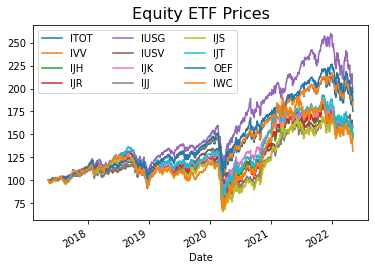

In [17]:
prices[tickers['equity']].rebase().plot()
plt.title('Equity ETF Prices',{'fontsize':16})
plt.legend(ncol=3)
plt.show()

In [23]:
mtest = prices[tickers['equity']].asfreq('m',method='ffill').pct_change().dropna()
pd.DataFrame.from_dict({
 'annualized monthly return':mtest.mean()*12*100,
 'annualized monthly volatility':mtest.std()*np.sqrt(12)*100,
 'annualized monthly sharpe':mtest.mean() / mtest.std() * np.sqrt(12),
}).T.round(2)

,ITOT,IVV,IJH,IJR,IUSG,IUSV,IJK,IJJ,IJS,IJT,OEF,IWC
annualized monthly return,13.64,14.11,11.14,11.54,16.08,11.22,10.59,11.26,11.36,11.32,14.66,10.38
annualized monthly volatility,17.02,16.50,20.00,21.89,18.01,17.03,19.00,21.95,23.51,21.20,16.52,24.08
annualized monthly sharpe,0.80,0.86,0.56,0.53,0.89,0.66,0.56,0.51,0.48,0.53,0.89,0.43


In [24]:
prices[tickers['equity']].asfreq('m',method='ffill')

,ITOT,IVV,IJH,IJR,IUSG,IUSV,IJK,IJJ,IJS,IJT,OEF,IWC
Date,,,,,,,,,,,,
2017-05-31,50.543461,221.552719,159.499405,63.651791,45.658443,44.650993,46.525684,66.486046,63.118607,72.756157,97.954987,80.097237
2017-06-30,51.010551,223.030579,162.024826,65.502144,45.514351,45.511974,47.069294,67.940262,64.985672,74.869415,98.538506,84.406296
2017-07-31,51.977009,227.657791,163.459244,66.156128,46.656937,46.128445,47.430775,68.566841,65.473717,75.829605,100.621742,83.898499
2017-08-31,52.041431,228.280838,160.962997,64.530502,47.270714,45.511974,46.951996,67.149048,63.693596,74.019684,101.331512,83.165642
2017-09-30,53.292820,232.940872,167.233871,69.559853,47.857639,47.061924,48.556061,70.138756,69.158813,79.148476,103.092102,90.087936
2017-10-31,54.485729,238.356247,171.029129,70.159683,49.431400,47.619289,50.180519,70.781670,69.569183,80.081947,105.574486,89.792244
2017-11-30,56.141029,245.797653,177.404404,72.615150,50.834511,49.264439,52.042526,73.459030,72.185211,82.713974,108.677444,92.138618
2017-12-31,56.816761,248.769363,177.864502,72.233459,51.155064,50.045147,51.956924,73.863342,71.916367,82.112961,110.414574,91.679787
2018-01-31,59.781197,262.926575,182.794220,74.048439,54.732201,51.978298,54.198124,74.790627,72.871689,85.042290,116.873390,93.710518


In [38]:
aggressive = bt.Strategy('aggressive', algos = [
bt.algos.RunQuarterly(),
bt.algos.SelectAll(),
bt.algos.WeighSpecified(ITOT=0.8,AGG=0.2),
bt.algos.Rebalance()])

In [39]:
backtest_aggressive = bt.Backtest(aggressive,prices)

In [40]:
report = bt.run(backtest_aggressive)

In [41]:
report

{'aggressive': <ffn.core.PerformanceStats at 0x7f1831b2a7f0>}

<AxesSubplot:title={'center':'Equity Progression'}>

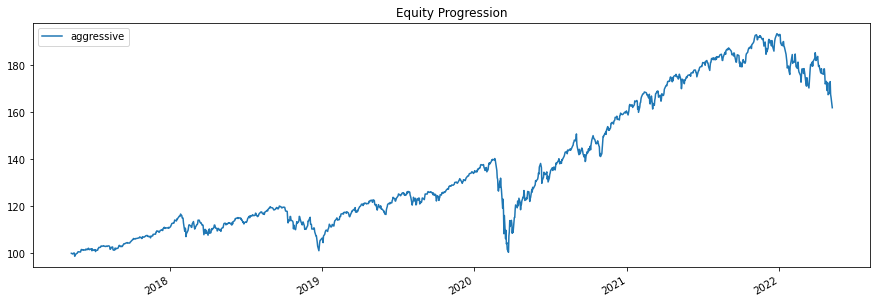

In [42]:
report.plot()

mtd stands for month to date

In [43]:
report.display_lookback_returns()

,aggressive
mtd,-3.30%
3m,-12.35%
6m,-15.88%
ytd,-15.84%
1y,-8.08%
3y,10.39%
5y,10.11%
10y,nan%
incep,10.11%


In [ ]:
res.prices.to_returns()



In [46]:
report.prices

,aggressive
2017-05-09,100.000000
2017-05-10,100.000000
2017-05-11,99.794287
2017-05-12,99.707773
2017-05-15,100.122759
...,...
2022-05-03,168.718076
2022-05-04,172.946434
2022-05-05,167.500648
2022-05-06,166.288030


In [47]:
report.prices.to_returns()

,aggressive
2017-05-09,NaN
2017-05-10,0.000000
2017-05-11,-0.002057
2017-05-12,-0.000867
2017-05-15,0.004162
...,...
2022-05-03,0.003809
2022-05-04,0.025062
2022-05-05,-0.031488
2022-05-06,-0.007239


El to_returns calula el retorno diario utilizando los precios del portfolio.

In [53]:
(report.prices.values[-1] - report.prices.values[-2])/report.prices.values[-2]

array([-0.02667562])